<h1 style="font-size: 1.8rem; font-weight: bold">Module 1 - Topic 1: Graph Traversal Algorithms</h1>
<p style="margin-top: 5px; margin-bottom: 5px;">Monash University Australia</p>
<p style="margin-top: 5px; margin-bottom: 5px;">ITO 4001: Foundations of Computing</p>
<p style="margin-top: 5px; margin-bottom: 5px;">Jupyter Notebook by: Tristan Sim Yook Min</p>

---

### **Breath First Search (BFS)**

Breadth First Search (BFS) is a search algorithm to explore vertices and edges of a graph. It is very **Effective at Finding the Shortest Path in an Unweighted Graph**. It starts with from one node on the graph and explores its neighbourig nodes first (first level) before exploring the next level of neighbours. It is ussaully used with a **Queue Data Structure**.

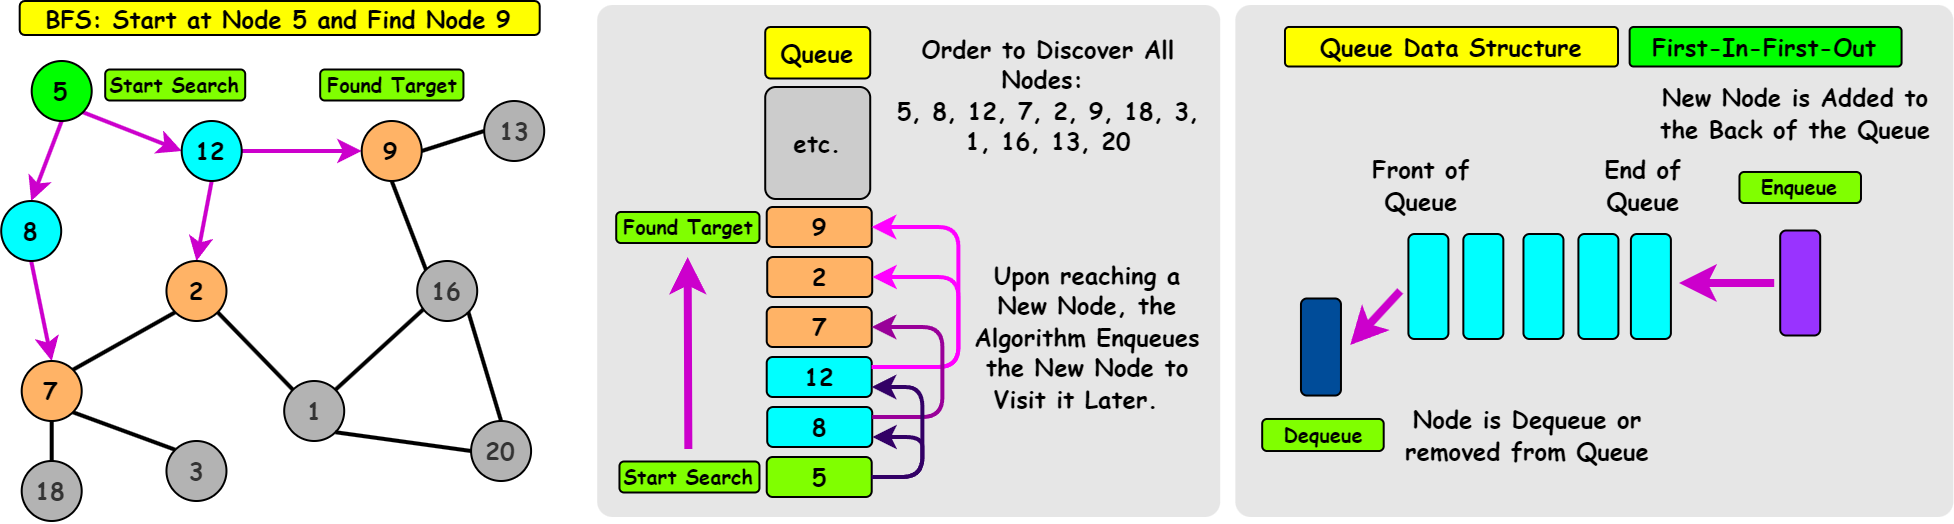

#### **Time and Space Complexity**

$O(V + E)$ time complexity means the number of operations scales linearly with the number of vertices ($V$) plus the number of edges ($E$) . Each vertex is processed once, and each edge is examined once.

$O(V)$ space complexity means the memory usage scales linearly with the number of vertices. The algorithm needs to potentially store information about each vertex.

- **Time Complexity**: $O(V + E)$
  - Operations scale Linearly with Vertices ($V$) + Edges ($E$) 
  - Each vertex is processed exactly once: $O(V)$ operations
  - Each edge is examined exactly once: $O(E)$ operations

- **Space Complexity**: $O(V)$
  - Memory usage scales linearly with number of vertices
  - Queue may store up to $V$ vertices at once
  - Visited tracking requires space for all $V$ vertices
  - Path reconstruction needs up to $V$ entries

BFS execution from node 5:

| Step | Queue Size   | Current Node | Visited Nodes      | Vertex Operations | Edge Operations | Total Operations |
|------|----------|---------|--------------|------------|----------|-----------|
| 1    | [5]      | -       | []           | 0          | 0        | 0         |
| 2    | [8,12]   | 5       | [5]          | 1          | 2        | 3         |
| 3    | [12,7]   | 8       | [5,8]        | 2          | 3        | 5         |
| 4    | [7,9]    | 12      | [5,8,12]     | 3          | 4        | 7         |
| 5    | [9]      | 7       | [5,8,12,7]   | 4          | 4        | 8         |
| 6    | []       | 9       | [5,8,12,7,9] | 5          | 4        | 9         |

Final counts:
- Vertex operations: 5 (one per vertex) → $O(V)$
- Edge operations: 4 (one per edge) → $O(E)$
- Total operations: 9 → $O(V + E)$
- Maximum queue size: 2 → $O(V)$ space

In [ ]:
# Breath First Search Algorithm
from collections import deque

# Parameters 
# (Graph: Adjacency List) | Interpretation: graph = {1: [2, 3], 2: [], 3: [2]}
# Node 1 has directed edges pointing to nodes 2 and 3
# Node 2 has no outgoing edges
# Node 3 has a directed edge pointing to node 2
graph = {
    5: [12, 8],
    12: [5, 9, 2],
    8: [5, 7],
    9: [12, 13, 16],
    2: [12, 7, 1],
    7: [8, 2, 18],
    13: [9],
    16: [9, 20],
    18: [7],
    1: [2, 3, 20],
    3: [1],
    20: [1, 16]
}

start_node = 5
target_node = 9  # The Node to be Found
is_directed = True  # Set to False for undirected graph

def bfs(graph, start_node, target_node=None, is_directed=False):
    """
    Performs Breadth-First Search on a graph with complexity tracking.
    
    Args:
        graph: A dictionary where keys are nodes and values are lists of adjacent nodes
        start_node: The node to start BFS from
        target_node: Optional node to search for (if None, explores the entire graph)
        is_directed: Boolean indicating if the graph is directed (True) or undirected (False)
    
    Returns:
        visited: List of nodes in the order they were discovered
        path: Dictionary of {node: predecessor} for reconstructing paths
        complexity: Dictionary containing complexity metrics
    """
    # Create a queue for BFS
    queue = deque([start_node])
    
    # Keep track of visited nodes and their predecessors (for path reconstruction)
    visited = []
    path = {start_node: None}  # Store predecessors for path reconstruction
    
    # Complexity tracking
    vertex_ops = 0
    edge_ops = 0
    max_queue_size = 1  # Start with one item in queue
    
    print(f"Starting BFS from node {start_node}")
    
    # While the queue is not empty
    while queue:
        # Track maximum queue size (for space complexity)
        max_queue_size = max(max_queue_size, len(queue))
        
        # Dequeue a vertex from queue
        current_node = queue.popleft()
        
        # If we haven't processed this node yet
        if current_node not in visited:
            # Process current node
            visited.append(current_node)
            vertex_ops += 1  # Count vertex operation
            print(f"Visiting node: {current_node}")
            
            # If we found the target, we can stop
            if target_node is not None and current_node == target_node:
                print(f"Found target node {target_node}!")
                break
            
            # Get all adjacent vertices
            neighbors = graph.get(current_node, [])
            for neighbor in neighbors:
                edge_ops += 1  # Count examining each edge
                
                if neighbor not in visited and neighbor not in queue:
                    # Mark it and enqueue it
                    queue.append(neighbor)
                    # Remember where we came from (for path reconstruction)
                    if neighbor not in path:
                        path[neighbor] = current_node
    
    # Prepare complexity information
    complexity = {
        'vertex_ops': vertex_ops,
        'edge_ops': edge_ops,
        'total_ops': vertex_ops + edge_ops,
        'max_queue_size': max_queue_size
    }
    
    return visited, path, complexity

def reconstruct_path(path, start_node, target_node):
    """
    Reconstructs the path from start_node to target_node using the path dictionary.
    
    Args:
        path: Dictionary of {node: predecessor}
        start_node: Starting node
        target_node: Target node
    
    Returns:
        List representing the path from start_node to target_node
    """
    if target_node not in path:
        return None  # No path exists
        
    # Work backwards from target to start
    current = target_node
    path_list = [current]
    
    while current != start_node:
        current = path[current]
        path_list.append(current)
    
    # Reverse to get start→target order
    return path_list[::-1]

visited_nodes, paths, complexity = bfs(graph, start_node, target_node, is_directed)
print(f"\nNodes visited in order: {visited_nodes}")

# Reconstruct the shortest path
shortest_path = reconstruct_path(paths, start_node, target_node)
print(f"Shortest path from {start_node} to {target_node}: {shortest_path}")

# Output the graph information
print(f"\nGraph information:")
print(f"Nodes: {list(graph.keys())}")
print(f"Number of nodes: {len(graph)}")

# Count edges appropriately based on graph type
if is_directed:
    # For directed graph, just count all edges in adjacency lists
    edge_count = sum(len(neighbors) for neighbors in graph.values())
    print(f"Number of edges (directed): {edge_count}")
else:
    # For undirected graph, each edge appears twice in adjacency list
    edge_count = sum(len(neighbors) for neighbors in graph.values()) // 2
    print(f"Number of edges (undirected): {edge_count}")

# Print complexity analysis
print("\n===== Complexity Analysis =====")
print(f"Vertex operations: {complexity['vertex_ops']} (one per vertex processed) → O(V)")
print(f"Edge operations: {complexity['edge_ops']} (one per edge examined) → O(E)")
print(f"Total operations: {complexity['total_ops']} → O(V + E)")
print(f"Maximum queue size: {complexity['max_queue_size']} → Space complexity: O(V)")

Starting BFS from node 5
Visiting node: 5
Visiting node: 12
Visiting node: 8
Visiting node: 9
Found target node 9!

Nodes visited in order: [5, 12, 8, 9]
Shortest path from 5 to 9: [5, 12, 9]

Graph information:
Nodes: [5, 12, 8, 9, 2, 7, 13, 16, 18, 1, 3, 20]
Number of nodes: 12
Number of edges (directed): 26

===== Complexity Analysis =====
Vertex operations: 4 (one per vertex processed) → O(V)
Edge operations: 7 (one per edge examined) → O(E)
Total operations: 11 → O(V + E)
Maximum queue size: 3 → Space complexity: O(V)


---

### **Depth First Search (DFS)**

Depth First Search (DFS) is an algorithm that explores a graph by diving as deep as possible along each branch before backtracking, using a stack (often implemented through recursion) to track its path. Though simple in concept, DFS becomes powerful when adapted for specific applications, excelling at identifying connected components, determining path existence between nodes, detecting cycles, finding bridges and articulation points, and solving maze-like problems—all tasks where the algorithm's depth-prioritizing approach provides elegant solutions with relatively efficient memory usage.

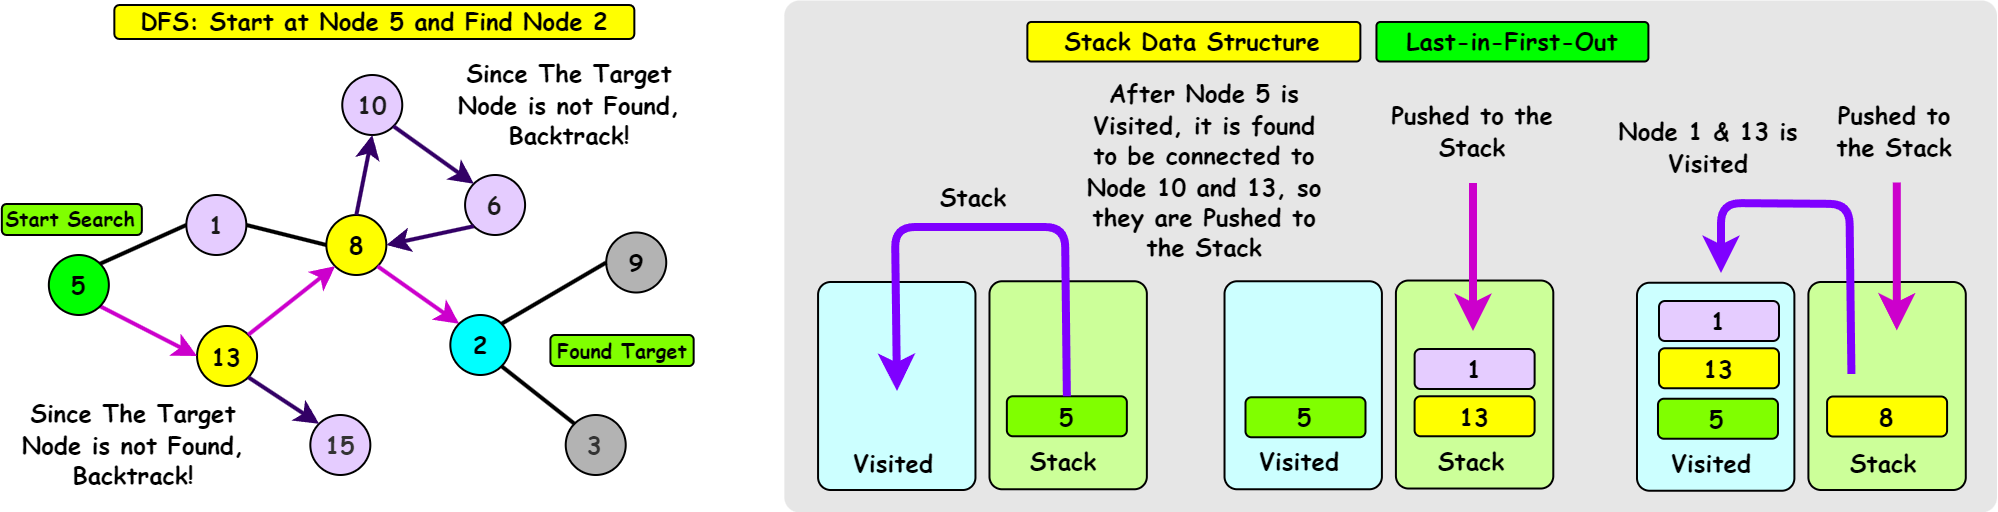

#### **Time and Space Complexity**

$O(V + E)$ time complexity means the number of operations scales linearly with the number of vertices ($V$) plus the number of edges ($E$). Each vertex is processed once, and each edge is examined once.

$O(V)$ space complexity for the iterative version means memory usage scales linearly with the number of vertices. However, the recursive implementation uses $O(H)$ space where $H$ is the maximum depth of the recursion (height of the DFS tree).

- **Time Complexity**: $O(V + E)$
  - Operations scale linearly with Vertices ($V$) + Edges ($E$)
  - Each vertex is processed exactly once: $O(V)$ operations
  - Each edge is examined exactly once: $O(E)$ operations

- **Space Complexity**: $O(V)$ for iterative, $O(H)$ for recursive
  - Iterative: Stack may store up to $V$ vertices at once
  - Recursive: Call stack can reach depth $H$ (can be as large as $V$ in worst case)
  - Visited tracking requires space for all $V$ vertices
  - Path reconstruction needs up to $V$ entries

#### **DFS Execution from Node 5 to Find Node 2**

| Step | Stack           | Current Node | Visited Nodes | Vertex Operations | Edge Operations | Total Operations |
|------|----------------|--------------|---------------|-------------------|-----------------|------------------|
| 1    | [5]            | -            | []            | 0                 | 0               | 0                |
| 2    | [13,1]         | 5            | [5]           | 1                 | 2               | 3                |
| 3    | [13]           | 1            | [5,1]         | 2                 | 3               | 5                |
| 4    | [13,8]         | 1            | [5,1]         | 2                 | 4               | 6                |
| 5    | [13,8]         | -            | [5,1]         | 2                 | 4               | 6                |
| 6    | [8]            | 13           | [5,1,13]      | 3                 | 5               | 8                |
| 7    | [8,15]         | 13           | [5,1,13]      | 3                 | 6               | 9                |
| 8    | [8,15]         | -            | [5,1,13]      | 3                 | 6               | 9                |
| 9    | [15]           | 8            | [5,1,13,8]    | 4                 | 7               | 11               |
| 10   | [15,2,10]      | 8            | [5,1,13,8]    | 4                 | 9               | 13               |
| 11   | [15,2,10]      | -            | [5,1,13,8]    | 4                 | 9               | 13               |
| 12   | [15,2]         | 10           | [5,1,13,8,10] | 5                 | 10              | 15               |
| 13   | [15,2,6]       | 10           | [5,1,13,8,10] | 5                 | 11              | 16               |
| 14   | [15,2,6]       | -            | [5,1,13,8,10] | 5                 | 11              | 16               |
| 15   | [15,2]         | 6            | [5,1,13,8,10,6] | 6               | 11              | 17               |
| 16   | [15,2]         | -            | [5,1,13,8,10,6] | 6               | 11              | 17               |
| 17   | [15]           | 2            | [5,1,13,8,10,6,2] | 7             | 11              | 18               |
| 18   | [15]           | -            | [5,1,13,8,10,6,2] | 7             | 11              | 18               |

Final counts:
- Vertex operations: 7 (one per vertex accessed) → $O(V)$
- Edge operations: 11 (one per edge examined) → $O(E)$
- Total operations: 18 → $O(V + E)$
- Maximum stack depth: 3 → $O(V)$ space in worst case

In [39]:
# Depth First Search Algorithm
from collections import deque

# Parameters 
# (Graph: Adjacency List) | Interpretation: graph = {1: [2, 3], 2: [], 3: [2]}
# Node 1 has directed edges pointing to nodes 2 and 3
# Node 2 has no outgoing edges
# Node 3 has a directed edge pointing to node 2
graph = {
    5: [12, 8],
    12: [5, 9, 2],
    8: [5, 7],
    9: [12, 13, 16],
    2: [12, 7, 1],
    7: [8, 2, 18],
    13: [9],
    16: [9, 20],
    18: [7],
    1: [2, 3, 20],
    3: [1],
    20: [1, 16]
}

start_node = 5
target_node = 16  # The Node to be Found
is_directed = True  # Set to False for undirected graph

def dfs(graph, start_node, target_node=None, is_directed=False):
    """
    Performs Depth-First Search on a graph.
    
    Args:
        graph: A dictionary where keys are nodes and values are lists of adjacent nodes
        start_node: The node to start DFS from
        target_node: Optional node to search for (if None, explores the entire graph)
        is_directed: Boolean indicating if the graph is directed (True) or undirected (False)
    
    Returns:
        visited: List of nodes in the order they were discovered
        path: Dictionary of {node: predecessor} for reconstructing paths
        complexity: Dictionary containing complexity metrics
    """
    # Keep track of visited nodes and their predecessors (for path reconstruction)
    visited = []
    path = {start_node: None}  # Store predecessors for path reconstruction
    
    # Complexity tracking
    vertex_ops = 0
    edge_ops = 0
    max_recursion_depth = 0
    current_recursion_depth = 0
    
    # Define recursive DFS function
    def dfs_recursive(node):
        nonlocal vertex_ops, edge_ops, max_recursion_depth, current_recursion_depth
        
        # Increase recursion depth
        current_recursion_depth += 1
        max_recursion_depth = max(max_recursion_depth, current_recursion_depth)
        
        # Process current node
        visited.append(node)
        vertex_ops += 1
        
        print(f"Visiting node: {node} (Depth: {current_recursion_depth})")
        
        # If we found the target, we can stop
        if target_node is not None and node == target_node:
            print(f"Found target node {target_node}!")
            current_recursion_depth -= 1
            return True
            
        # Explore all neighbors (depth-first)
        neighbors = graph.get(node, [])
        for neighbor in neighbors:
            edge_ops += 1  # Count examining each edge
            
            if neighbor not in visited:
                # Remember where we came from (for path reconstruction)
                path[neighbor] = node
                # Recursively visit this neighbor
                if dfs_recursive(neighbor):
                    current_recursion_depth -= 1
                    return True
        
        # Decrease recursion depth when backtracking
        current_recursion_depth -= 1
        return False
    
    print(f"Starting DFS from node {start_node}")
    dfs_recursive(start_node)
    
    # Prepare complexity information
    complexity = {
        'vertex_ops': vertex_ops,
        'edge_ops': edge_ops,
        'total_ops': vertex_ops + edge_ops,
        'max_recursion_depth': max_recursion_depth
    }
    
    return visited, path, complexity

def reconstruct_path(path, start_node, target_node):
    """
    Reconstructs the path from start_node to target_node using the path dictionary.
    
    Args:
        path: Dictionary of {node: predecessor}
        start_node: Starting node
        target_node: Target node
    
    Returns:
        List representing the path from start_node to target_node
    """
    if target_node not in path:
        return None  # No path exists
        
    # Work backwards from target to start
    current = target_node
    path_list = [current]
    
    while current != start_node:
        current = path[current]
        path_list.append(current)
    
    # Reverse to get start→target order
    return path_list[::-1]

visited_nodes, paths, complexity = dfs(graph, start_node, target_node, is_directed)
print(f"\nNodes visited in order: {visited_nodes}")

# Reconstruct the path
dfs_path = reconstruct_path(paths, start_node, target_node)
print(f"Path from {start_node} to {target_node}: {dfs_path}")

# Output the graph information
print(f"\nGraph information:")
print(f"Nodes: {list(graph.keys())}")
print(f"Number of nodes: {len(graph)}")

# Count edges appropriately based on graph type
if is_directed:
    # For directed graph, just count all edges in adjacency lists
    edge_count = sum(len(neighbors) for neighbors in graph.values())
    print(f"Number of edges (directed): {edge_count}")
else:
    # For undirected graph, each edge appears twice in adjacency list
    edge_count = sum(len(neighbors) for neighbors in graph.values()) // 2
    print(f"Number of edges (undirected): {edge_count}")

# Print complexity analysis
print("\n===== Complexity Analysis =====")
print(f"Vertex operations: {complexity['vertex_ops']} (one per vertex processed) → O(V)")
print(f"Edge operations: {complexity['edge_ops']} (one per edge examined) → O(E)")
print(f"Total operations: {complexity['total_ops']} → O(V + E)")
print(f"Maximum recursion depth: {complexity['max_recursion_depth']} → Space complexity: O(H) where H is the height of DFS tree")

Starting DFS from node 5
Visiting node: 5 (Depth: 1)
Visiting node: 12 (Depth: 2)
Visiting node: 9 (Depth: 3)
Visiting node: 13 (Depth: 4)
Visiting node: 16 (Depth: 4)
Found target node 16!

Nodes visited in order: [5, 12, 9, 13, 16]
Path from 5 to 16: [5, 12, 9, 16]

Graph information:
Nodes: [5, 12, 8, 9, 2, 7, 13, 16, 18, 1, 3, 20]
Number of nodes: 12
Number of edges (directed): 26

===== Complexity Analysis =====
Vertex operations: 5 (one per vertex processed) → O(V)
Edge operations: 7 (one per edge examined) → O(E)
Total operations: 12 → O(V + E)
Maximum recursion depth: 4 → Space complexity: O(H) where H is the height of DFS tree


---
### **Topological Sort**

Topological Sort is an algorithm for linearly ordering the vertices of a directed graph such that for every directed edge (u,v), vertex u comes before vertex v in the ordering. This is only possible for **Directed Acyclic Graphs (DAGs)**. A topological ordering is a linear ordering of vertices such that for every directed edge (u,v) from vertex u to vertex v, u comes before v in the ordering. The algorithm produces a valid sequence for processing tasks that have dependencies. One of the key benefits of a topological sort is that it can **detect cycles**. Depth First Search and Kahn's Algorithm are the two main algorithm used for topological sorts.


#### **Properties**
| **Property** | **Description** |
|--------------|----------------|
| **Graph** | Only possible for Directed Acyclic Graphs (DAGs) |
| **Cyclic Graphs** | If the graph has a cycle, no valid topological ordering exists |
| **Solution Uniqueness** | Multiple valid topological orderings may exist for a single graph |
| **First Vertex** | The first vertex in a topological sort has no incoming edges (no dependencies) |
| **Last Vertex** | The last vertex in a topological sort has no outgoing edges (no dependents) |


#### **Applications**
| **Application** | **Description** | 
|-----------------|----------------|
| **Task Scheduling** | Determining the order to perform dependent tasks | 
| **Software Compilation Systems** | Ordering compilation of interdependent modules | 
| **Course Prerequisites** | Planning course sequences in academic scheduling | 
| **Package Dependencies** | Resolving installation order for software packages | 
| **Data Processing Pipelines** | Ordering operations in data workflows | 

#### **Two Main Algorithms**

| **Algorithm** | **Key Steps** | **Characteristics** |
|---------------|--------------|-------------------|
| **Depth First Search** | 1. Perform DFS traversal of the graph<br>2. As each vertex finishes (after exploring all descendants), add it to the front of the result list<br>3. The resulting list is a valid topological sort | • Intuitive extension of DFS<br>• Uses recursion<br>• Naturally detects cycles<br>• Often simpler to implement |
| **Kahn's Algorithm** | 1. Identify all vertices with no incoming edges (sources)<br>2. Remove a source, add it to the result, and remove its outgoing edges<br>3. Repeat until all vertices are processed or a cycle is detected | • Iterative approach<br>• No recursion needed<br>• Can report partial ordering even with cycles<br>• Requires tracking in-degrees |


#### **Time and Space Complexity**

- **Time Complexity:** $O(V + E)$
  - We process each vertex and edge exactly once
  - $V$ = number of vertices
  - $E$ = number of edges

- **Space Complexity:** $O(V)$ (Need to store the Following)
  - The visited status for each vertex
  - The recursion stack (DFS approach)
  - The result ordering
  - The in-degree count (Kahn's algorithm)


#### **Code: Example of Topological Sort**

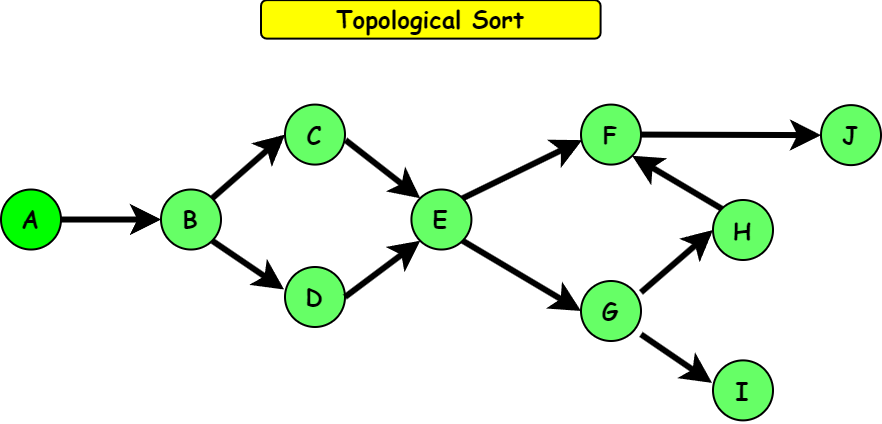


In [4]:
from collections import defaultdict, deque

def is_dag(graph):
    """
    Check if the graph is a Directed Acyclic Graph (DAG)
    
    Args:
        graph (dict): Adjacency list representation of the graph
        
    Returns:
        bool: True if the graph is a DAG, False otherwise
    """
    visited = {}  # 0: not visited, 1: in current DFS path, 2: completely visited
    for node in graph:
        visited[node] = 0
        
    def dfs(node):
        if visited[node] == 1:  # Node is in current path (cycle detected)
            return False
        if visited[node] == 2:  # Node has been completely visited
            return True
            
        visited[node] = 1  # Mark as in current path
        
        # Visit all neighbors
        for neighbor in graph[node]:
            if not dfs(neighbor):
                return False
                
        visited[node] = 2  # Mark as completely visited
        return True
    
    # Check each node
    for node in graph:
        if visited[node] == 0:
            if not dfs(node):
                return False
                
    return True

def topological_sort_dfs(graph):
    """
    Perform topological sort using DFS approach
    
    Args:
        graph (dict): Adjacency list representation of the graph
        
    Returns:
        list: A valid topological ordering
    """
    # Mark all vertices as not visited
    visited = {node: False for node in graph}
    # Stack to store result
    stack = []
    
    def dfs_visit(node):
        # Mark current node as visited
        visited[node] = True
        
        # Visit all neighbors
        for neighbor in graph[node]:
            if not visited[neighbor]:
                dfs_visit(neighbor)
        
        # After visiting all neighbors, add to stack
        stack.append(node)
    
    # Visit all nodes
    for node in graph:
        if not visited[node]:
            dfs_visit(node)
    
    # Return stack in reverse order
    return stack[::-1]  # Reverse the stack to get topological order

def topological_sort_kahns(graph):
    """
    Perform topological sort using Kahn's algorithm
    
    Args:
        graph (dict): Adjacency list representation of the graph
        
    Returns:
        list: A valid topological ordering
    """
    # Calculate in-degree for each node (how many edges point to it)
    in_degree = defaultdict(int)
    for node in graph:
        for neighbor in graph[node]:
            in_degree[neighbor] += 1
    
    # Ensure all nodes have an entry in in_degree
    for node in graph:
        if node not in in_degree:
            in_degree[node] = 0
    
    # Create a queue of nodes with no dependencies (in-degree = 0)
    queue = deque([node for node, degree in in_degree.items() if degree == 0])
    
    # List to store topological order
    topo_order = []
    
    # Process all vertices
    while queue:
        # Remove a vertex with in-degree 0
        current = queue.popleft()
        topo_order.append(current)
        
        # For each neighbor, reduce its in-degree by 1
        for neighbor in graph[current]:
            in_degree[neighbor] -= 1
            # If in-degree becomes 0, add to queue
            if in_degree[neighbor] == 0:
                queue.append(neighbor)
    
    # Check if we processed all vertices (if not, there's a cycle)
    if len(topo_order) != len(graph):
        return None  # Graph has a cycle
    
    return topo_order

def find_all_topological_sorts(graph):
    """
    Find all possible topological sorts of a DAG using backtracking
    
    Args:
        graph (dict): Adjacency list representation of the graph
        
    Returns:
        list: List of all possible topological sorts
    """
    # Calculate in-degree for each node (how many edges point to it)
    in_degree = defaultdict(int)
    for node in graph:
        for neighbor in graph[node]:
            in_degree[neighbor] += 1
    
    # Ensure all nodes have an entry in in_degree
    for node in graph:
        if node not in in_degree:
            in_degree[node] = 0
    
    # Find all possible topological sorts
    all_sorts = []
    current_sort = []
    
    def backtrack():
        # If all nodes are included in current_sort, we found a valid ordering
        if len(current_sort) == len(graph):
            all_sorts.append(list(current_sort))
            return
        
        # Try each node with in-degree 0 (no dependencies)
        zero_in_degree = [node for node, degree in in_degree.items() if degree == 0]
        
        for node in zero_in_degree:
            # Add node to current sort
            current_sort.append(node)
            
            # Temporarily remove node (decrease in-degrees of neighbors)
            in_degree[node] = -1  # Mark as used
            for neighbor in graph[node]:
                in_degree[neighbor] -= 1
            
            # Recurse
            backtrack()
            
            # Backtrack (restore state)
            for neighbor in graph[node]:
                in_degree[neighbor] += 1
            in_degree[node] = 0
            current_sort.pop()
    
    # Start backtracking
    backtrack()
    return all_sorts

def main():
    # Example graph - University Subject Prerequisites
    graph = {
        'A': ['B'],
        'B': ['C', 'D'],
        'C': ['E'],
        'D': ['E'],
        'E': ['F', 'G'],
        'F': ['J'],
        'G': ['H', 'I'],
        'H': ['F'],
        'I': [],
        'J': []
    }
    
    # Check if the graph is a DAG
    if not is_dag(graph):
        print("The graph contains cycles. Topological sorting is not possible.")
        return
    
    # Use DFS approach
    dfs_result = topological_sort_dfs(graph)
    print(f"DFS Topological Sort: {dfs_result}")
    
    # Use Kahn's algorithm
    kahns_result = topological_sort_kahns(graph)
    print(f"Kahn's Algorithm Topological Sort: {kahns_result}")
    
    # Find all possible topological sorts
    all_sorts = find_all_topological_sorts(graph)
    
    # Print results
    print(f"\nFound {len(all_sorts)} possible topological orderings:")
    for i, sort in enumerate(all_sorts, 1):
        print(f"{i}. {sort}")

if __name__ == "__main__":
    main()

DFS Topological Sort: ['A', 'B', 'D', 'C', 'E', 'G', 'I', 'H', 'F', 'J']
Kahn's Algorithm Topological Sort: ['A', 'B', 'C', 'D', 'E', 'G', 'H', 'I', 'F', 'J']

Found 8 possible topological orderings:
1. ['A', 'B', 'C', 'D', 'E', 'G', 'H', 'F', 'J', 'I']
2. ['A', 'B', 'C', 'D', 'E', 'G', 'H', 'F', 'I', 'J']
3. ['A', 'B', 'C', 'D', 'E', 'G', 'H', 'I', 'F', 'J']
4. ['A', 'B', 'C', 'D', 'E', 'G', 'I', 'H', 'F', 'J']
5. ['A', 'B', 'D', 'C', 'E', 'G', 'H', 'F', 'J', 'I']
6. ['A', 'B', 'D', 'C', 'E', 'G', 'H', 'F', 'I', 'J']
7. ['A', 'B', 'D', 'C', 'E', 'G', 'H', 'I', 'F', 'J']
8. ['A', 'B', 'D', 'C', 'E', 'G', 'I', 'H', 'F', 'J']
